In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Adjust this number incrementally
number_of_rows = 100000

# Read the specified number of rows from the CSV file
df = pd.read_csv("Spaghetti.csv", nrows=number_of_rows)


df.tail(30)

URL Label
99970                canadiandimension.com/articles/3171  good
99971                            canadiandragqueens.com/  good
99972  canadianfinanceblog.com/is-the-current-market-...  good
99973                       canadianfishingpal.com/d/on/  good
99974                      canadianfootballscouting.com/  good
99975  canadianfootballscouting.com/2010/03/nic-top-q...  good
99976  canadianfootballscouting.com/category/canada-f...  good
99977  canadianfootballscouting.com/category/uncatego...  good
99978               canadianforcesmilitary.com/navy.html  good
99979                             canadiangeographic.ca/  good
99980                     canadiangeriatrics.ca/default/  good
99981                   canadiangrandprix.wordpress.com/  good
99982                canadianheroes.org/henri/henri3.htm  good
99983                canadianheroes.org/henri/henri4.htm  good
99984                           canadianiceprincess.com/  good
99985                canadianiranianartsassociation.com/  good
99986                     canadianiranianfoundation.com/  good
99987                              canadianjiujitsu.com/  good
99988                canadianjuniorchampionship2011.com/  good
99989      canadianmedicalmarijuanasociety.blogspot.com/  good
99990             canadianmilitary.page.tl/Last-Post.htm  good
99991  canadianmotorsportsexpo.blogspot.com/2009/12/m...  good
99992                canadianmusicartists.wordpress.com/  good
99993                    canadianmusiconly.blogspot.com/  good
99994                         canadianopenfastpitch.com/  good
99995  canadianpassportsupport.com/birth-certificates...  good
99996  canadianponcho.activeboard.com/index.spark?aBI...  good
99997  canadianponcho.activeboard.com/index.spark?aBI...  good
99998  canadianprorodeohalloffame.com/inductees.php?s...  good
99999                            canadianrvpal.com/d/on/  good

In [3]:
df.columns=['URL','Type']
df.head(10)

URL  Type
0  paypal.com.fr.cgi-bin.webscr.cmd.login.submit....   bad
1  arapcadunyasi.net/scama/secure-code7/security/...   bad
2  paypal.com.fr.cgi-bin.webscr.cmd.login.submit....   bad
3  blog.dariuszemanowicz.pl/wp-includes/pomo/netw...   bad
4                promocaopontosfidelidade.k6.com.br/   bad
5                                      bit.ly/PquSFb   bad
6  erdely.ma/download/soc/userinfo/webscr.html?cm...   bad
7                               abc-staff.ru/abc.php   bad
8                    members.iinet.net.au/~patrick6/  good
9                        www.execusite.com/mcumella/  good

In [4]:
type_to_category_id = {
    'bad': 0,
    'good': 1
}

# Add 'category_id' column
df['category_id'] = df['Type'].map(type_to_category_id)

good_df = df[df['category_id'] == 1]
bad_df = df[df['category_id'] == 0]

good_df


URL  Type  category_id
8                        members.iinet.net.au/~patrick6/  good            1
9                            www.execusite.com/mcumella/  good            1
10                               sbcspa.tripod.com/sbcs/  good            1
11                             users.erols.com/atyrsrvc/  good            1
12                                    w3.gorge.net/dede/  good            1
...                                                  ...   ...          ...
99995  canadianpassportsupport.com/birth-certificates...  good            1
99996  canadianponcho.activeboard.com/index.spark?aBI...  good            1
99997  canadianponcho.activeboard.com/index.spark?aBI...  good            1
99998  canadianprorodeohalloffame.com/inductees.php?s...  good            1
99999                            canadianrvpal.com/d/on/  good            1

[65265 rows x 3 columns]

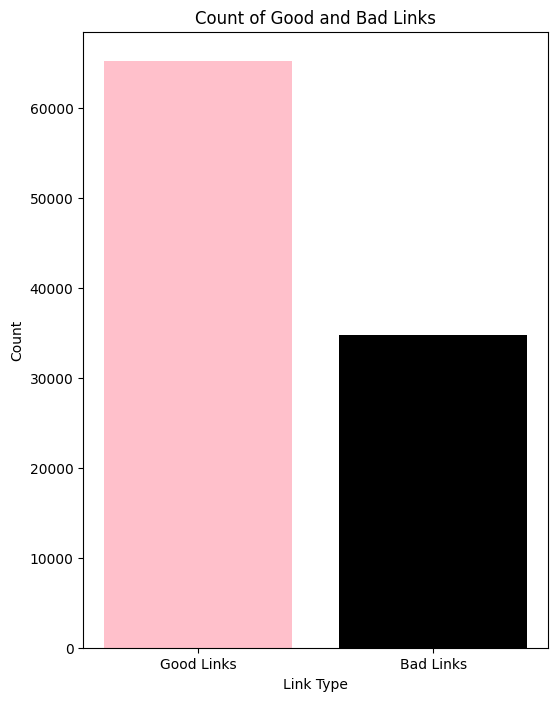

In [5]:
good_count = df[df['Type'] == 'good'].shape[0]
bad_count = df[df['Type'] == 'bad'].shape[0]

# Plot the bar chart
plt.figure(figsize=(6,8))
plt.bar(['Good Links', 'Bad Links'], [good_count, bad_count], color=['pink', 'black'])
plt.title('Count of Good and Bad Links')
plt.xlabel('Link Type')
plt.ylabel('Count')
plt.show()

In [6]:
#df = df.drop(['Type'], axis=1)
df

URL  Type  category_id
0      paypal.com.fr.cgi-bin.webscr.cmd.login.submit....   bad            0
1      arapcadunyasi.net/scama/secure-code7/security/...   bad            0
2      paypal.com.fr.cgi-bin.webscr.cmd.login.submit....   bad            0
3      blog.dariuszemanowicz.pl/wp-includes/pomo/netw...   bad            0
4                    promocaopontosfidelidade.k6.com.br/   bad            0
...                                                  ...   ...          ...
99995  canadianpassportsupport.com/birth-certificates...  good            1
99996  canadianponcho.activeboard.com/index.spark?aBI...  good            1
99997  canadianponcho.activeboard.com/index.spark?aBI...  good            1
99998  canadianprorodeohalloffame.com/inductees.php?s...  good            1
99999                            canadianrvpal.com/d/on/  good            1

[100000 rows x 3 columns]

In [7]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Assume df is already loaded
# df = pd.read_csv('Spaghetti.csv')

# Define the features and labels
X = df['URL']
y = df['category_id']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 80000
Testing set size: 20000


In [8]:
import tensorflow as tf
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Assuming X_train, X_test, y_train, y_test are defined earlier

# Convert URLs to a numerical representation using HashingVectorizer
vectorizer = HashingVectorizer(n_features=1000)
X_train_vect = vectorizer.fit_transform(X_train).toarray()
X_test_vect = vectorizer.transform(X_test).toarray()

# Define a logistic regression model using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1000,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_vect, y_train, epochs=10, batch_size=32)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_vect, y_test)
print(f"Test set accuracy: {test_accuracy:.4f}")

# Make predictions on the test data
y_predict = (model.predict(X_test_vect) > 0.5).astype("int32")

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_predict))

# Save the model in HDF5 format
model.save('my_model.keras')

# Load the saved Keras model
loaded_model = tf.keras.models.load_model('my_model.keras')

# Re-compile the loaded model (ensure the same configuration as original model)
loaded_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Evaluate the loaded model on the test set
loaded_model_loss, loaded_model_accuracy = loaded_model.evaluate(X_test_vect, y_test)
print(f"Loaded model test set accuracy: {loaded_model_accuracy:.4f}")


Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7126 - loss: 0.5765
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8595 - loss: 0.3762
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8859 - loss: 0.3041
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8944 - loss: 0.2690
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8995 - loss: 0.2503
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9025 - loss: 0.2399
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9030 - loss: 0.2339
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9053 - loss: 0.2270
Epoch 9/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9059 - loss: 0.2244
Epoch 10/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9064 - loss: 0.2219
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9011 - loss: 0.2330
Test set accuracy: 0.9029
625/625 ━━━━━━━━━━

In [9]:
# Get prediction probabilities for the test data
y_prob = model.predict(X_test_vect)

# Print prediction probabilities
for i, url in enumerate(X_test):
    print(f"URL: {url}")
    print(f"Probability of being harmful (bad link): {y_prob[i][0]:.4f}")
    # You can optionally print the probability of being safe (good link) as well
    # print(f"Probability of being safe (good link): {y_prob[i][1]:.4f}\n")

# Further analysis or utilization of predictions
# Example: Calculate average probability of being harmful
average_prob = y_prob.mean()
print(f"Average probability of being harmful: {average_prob:.4f}")

# Example: Save predictions or probabilities to a file for further analysis
with open('predictions.txt', 'w') as f:
    for i, url in enumerate(X_test):
        f.write(f"URL: {url}\n")
        f.write(f"Probability of being harmful (bad link): {y_prob[i][0]:.4f}\n\n")

# Further actions based on predictions
# Example: Filter URLs with high probability of being harmful
high_prob_threshold = 0.9
high_prob_urls = [url for i, url in enumerate(X_test) if y_prob[i][0] > high_prob_threshold]
print(f"URLs with high probability of being harmful (> {high_prob_threshold}):")
for url in high_prob_urls:
    print(url)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
URL: dayliliesbythepond.com/dev/hotmail/hotmail/
Probability of being harmful (bad link): 0.3908
URL: portalnutricional.com/uah2/index.php
Probability of being harmful (bad link): 0.0954
URL: tools.ietf.org/html/rfc2094
Probability of being harmful (bad link): 0.9839
URL: hubrich.dk/royalpetrol/dropboxlocation/
Probability of being harmful (bad link): 0.5145
URL: big12championshiptickets.com/
Probability of being harmful (bad link): 0.4430
URL: samyinayeh.com/login.htm
Probability of being harmful (bad link): 0.0442
URL: achealthcare.org/
Probability of being harmful (bad link): 0.8841
URL: bjcurio.com/js/index.htm?
Probability of being harmful (bad link): 0.1876
URL: jeu-repdom.promovacances.com/?emvar=abuse@avdyn.com
Probability of being harmful (bad link): 0.5667
URL: 1476671942.xiazaidown.com/cx/160624/6/msmessegerv7.5@152_514<br/>1.exe
Probability of being harmful (bad link): 0.0246
URL: www.ibm.com/developerworks/views/java/libraryview.jsp

In [11]:
import tensorflow as tf
import numpy as np

# Load the original model
original_model = tf.keras.models.load_model(r"C:\Users\zhiwe\OneDrive\Documents\hackathon\my_model.keras")

# Print original model summary
print("Original Model Summary:")
original_model.summary()

# Get the weights from the original model
weights, biases = original_model.get_weights()

# Create a new model using lower-level TensorFlow API
class SimpleModel(tf.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.w = tf.Variable(weights, name="w")
        self.b = tf.Variable(biases, name="b")

    @tf.function(input_signature=[tf.TensorSpec(shape=[None, 1000], dtype=tf.float32)])
    def __call__(self, x):
        return tf.nn.sigmoid(tf.matmul(x, self.w) + self.b)

# Create an instance of the new model
new_model = SimpleModel()

# Test the new model
test_input = tf.constant(np.random.randn(1, 1000).astype(np.float32))
test_output = new_model(test_input)
print("\nTest output shape:", test_output.shape)

# Convert the model to TFLite
concrete_func = new_model.__call__.get_concrete_function()
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func], new_model)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]

try:
    tflite_model = converter.convert()
    print("\nModel converted successfully")
    
    # Save the model
    with open('model.tflite', 'wb') as f:
        f.write(tflite_model)
    print("TFLite model saved as 'model.tflite'")
except Exception as e:
    print(f"\nError during conversion: {str(e)}")

Original Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │           1,001 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,005 (11.74 KB)

 Trainable params: 1,001 (3.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,004 (7.83 KB)


Test output shape: (1, 1)
INFO:tensorflow:Assets written to: C:\Users\zhiwe\AppData\Local\Temp\tmpg1s3wre5\assets


INFO:tensorflow:Assets written to: C:\Users\zhiwe\AppData\Local\Temp\tmpg1s3wre5\assets



Model converted successfully
TFLite model saved as 'model.tflite'
